In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp.models import ALP
from alp.models import F_lepton_2body
from alp.models import Gamma_tau
from alp import plot_tools as pt
Gamma_tau

2.267350867723045e-12

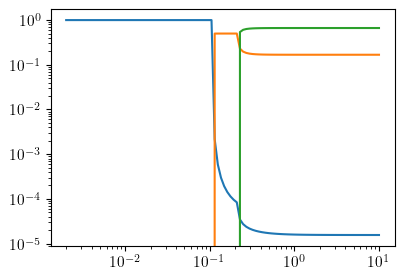

In [33]:
fa = 1e9
malps = np.geomspace(2e-3, 1e1, 100)
alps = ALP(malps, fa)

plt.loglog(malps, alps.Gamma_a_to_ee()/alps.Gamma_a)
plt.loglog(malps, alps.Gamma_a_to_me()/alps.Gamma_a)
plt.loglog(malps, alps.Gamma_a_to_mm()/alps.Gamma_a)



In [258]:
def plot_other_limits(ax):

    # BaBar Limit
    ma, qsi = np.genfromtxt("data/digitized/BABAR_leptophilic.dat", unpack=True)
    ax.fill_between(ma, (1 + (ma<const.m_tau - const.m_mu)*1e100)*qsi/const.vev_EW, qsi/qsi, label='BABAR', color='lightgrey', linestyle='-')
    ax.plot(ma, (1+(ma<const.m_tau - const.m_mu)*1e100)*qsi/const.vev_EW, label='BABAR', color='black', linestyle='-', lw=0.25)

    ma = np.geomspace(1e-3, 3, 1000)
    inv_fa = np.geomspace(1e-9,1e-2, 1000, endpoint=True)
    MA, INV_FA = np.meshgrid(ma, inv_fa)

    alps = ALP(MA, 1/INV_FA)

    ################################################################
    # Belle-II (Tau -> mu alp)
    ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
    B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 300, 100e100) # 3 m travel

    BR_tau_mu_a = 1/B_limit_90CL_interp * P_decay * alps.BR_tau_to_a_mu()
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    BR_tau_mu_a = alps.BR_tau_to_a_mu()
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1e-1,1e100], colors=['lightgrey'], alpha=1, zorder=0.2)
    # c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    ################################################################
    # Belle-II (Tau -> e alp)
    ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_e_a.dat", unpack=True)
    B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 300, 100e100) # 3 m travel

    BR_tau_e_a = 1/B_limit_90CL_interp * P_decay * alps.BR_tau_to_a_e()
    c=ax.contourf(MA, INV_FA, BR_tau_e_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_e_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    BR_tau_e_a = alps.BR_tau_to_a_e()
    c=ax.contourf(MA, INV_FA, BR_tau_e_a, levels=[1e-1,1e100], colors=['lightgrey'], alpha=1, zorder=0.2)
    # c=ax.contour(MA, INV_FA, BR_tau_e_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    ################################################################
    # Belle (Tau- -> e- (alp -> mu+ mu-)) + (Tau- -> mu- (alp -> mu+ e-))
    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 0, 1) # decays within 1 cm
    B_limit_90CL = 2.7e-8
    BR_tau_mu_a = 1/B_limit_90CL * P_decay * (alps.BR_tau_to_a_e() * alps.BR_a_to_mm + alps.BR_tau_to_a_mu() * alps.BR_a_to_me)
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    ################################################################
    # Belle (Tau- -> mu- (alp -> mu+ mu-))
    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 0, 1) # decays within 1 cm
    B_limit_90CL = 2.1e-8
    BR_tau_mu_a = 1/B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_mm
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    ################################################################
    # Belle (Tau- -> mu- (alp -> mu+ e-))
    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 0, 1) # decays within 1 cm
    B_limit_90CL = 2.7e-8
    BR_tau_mu_a = 1/B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_me
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    # Belle (Tau- -> mu- (alp -> mu- e+))
    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 0, 1) # decays within 1 cm
    B_limit_90CL = 1.7e-8
    BR_tau_mu_a = 1/B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_em
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)

    ################################################################
    # Belle (Tau- -> e- (alp -> mu+ e-))
    p_alp_avg = 10.58/4
    P_decay = alps.prob_decay(p_alp_avg, 0, 1) # decays within 1 cm
    B_limit_90CL = 1.5e-8
    BR_tau_mu_a = 1/B_limit_90CL * P_decay * alps.BR_tau_to_a_mu() * alps.BR_a_to_me
    c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], alpha=1, zorder=0)
    c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1, zorder=2)


In [259]:
X,Y,Z = np.load('data/ICARUS_rates.npy', allow_pickle=True)
Z.max()

np.float64(nan)

In [260]:

X,Y,Z = np.load('data/FASER_rates.npy', allow_pickle=True)
X

array([[0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ],
       [0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ],
       [0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ],
       ...,
       [0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ],
       [0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ],
       [0.1       , 0.1033527 , 0.1067054 , ..., 1.76964361, 1.7729963 ,
        1.776349  ]])

In [261]:
import scipy
smear_stddev=0.5
smear=True

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_1908/2686231676.py:10: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_1908/2686231676.py:33: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_1908/2686231676.py:56: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  Z = scipy.ndimage.filters.gaussian_

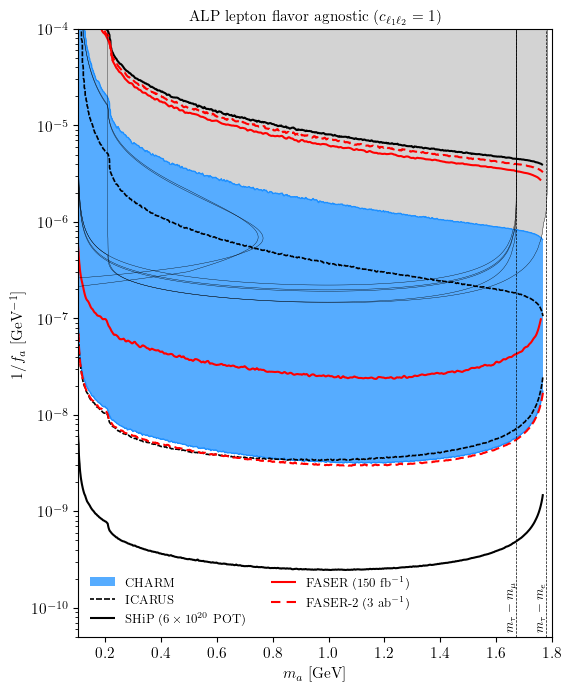

In [262]:
fig, ax = pt.std_fig(figsize=(6,8))

# labels for legend
labels = []
labelnames = []

Nsig = 2.3
X,Y,Z = np.load('data/CHARM_rates.npy', allow_pickle=True)
if smear: 
    Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('dodgerblue', 0.75)], alpha=1, zorder=1.4)
_ = ax.contour(X, Y, Z, levels=[Nsig], colors='dodgerblue', linestyles='-', linewidths=[1], alpha=1, zorder=2)
labels.append(c.legend_elements()[0][0])
labelnames.append('CHARM')

# X,Y,Z = np.load('data/BEBC_rates.npy', allow_pickle=True)
# c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkgreen', 0.85)], alpha=1, zorder=1.5)
# _ = ax.contour(X, Y, Z, levels=[Nsig], colors='darkgreen', linestyles='-', linewidths=[1], alpha=1, zorder=2)
# labels.append(c.legend_elements()[0][0])
# labelnames.append('BEBC')


# X,Y,Z = np.load('data/NA62_rates.npy', allow_pickle=True)
# c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('firebrick', 0.85)], alpha=1, zorder=1.1)
# _ = ax.contour(X, Y, Z, levels=[Nsig], colors='firebrick', linestyles='-', linewidths=[1], alpha=1, zorder=2)
# labels.append(c.legend_elements()[0][0])
# labelnames.append(r'NA62 ($1.4\times 10^{17}$ POT)')


Nsig = 2.3
X,Y,Z = np.load('data/ICARUS_rates.npy', allow_pickle=True)
if smear: 
    Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode='constant', order=0, cval=0)
# c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.1)
c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles=[(1,(3,1))], linewidths=[1.2], alpha=1, zorder=2)
labels.append(c.legend_elements()[0][0])
labelnames.append('ICARUS')

# X,Y,Z = np.load('data/MicroBooNE_rates.npy', allow_pickle=True)
# # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('black', 0.5)], alpha=1, zorder=1.2)
# c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1], alpha=1, zorder=2)
# labels.append(c.legend_elements()[0][0])
# labelnames.append('MicroBooNE')

# X,Y,Z = np.load('data/NoVA_rates.npy', allow_pickle=True)
# # c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('darkorange', 0.5)], alpha=1, zorder=1.3)
# c = ax.contour(X, Y, Z, levels=[Nsig], colors='darkorange', linestyles='-', linewidths=[1], alpha=1, zorder=2)
# labels.append(c.legend_elements()[0][0])
# labelnames.append('NOvA')




X,Y,Z = np.load('data/SHiP_rates.npy', allow_pickle=True)
if smear: 
    Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
c = ax.contour(X, Y, Z, levels=[Nsig], colors='black', linestyles='-', linewidths=[1.5], alpha=1, zorder=2)
labels.append(c.legend_elements()[0][0])
labelnames.append(r'SHiP ($6\times 10^{20}$ POT)')


X,Y,Z = np.load('data/FASER_rates.npy', allow_pickle=True)
if smear: 
    Z = scipy.ndimage.filters.gaussian_filter(Z, 2*smear_stddev, mode="nearest", order=0, cval=0)
# c = ax.contourf(X, Y, Z, levels=[Nsig, 1e100], colors=[pt.lighten_color('red', 0.95)], alpha=1, zorder=1.91)
c = ax.contour(X, Y, Z, levels=[Nsig], colors='red', linestyles=[(1,(5,0))], linewidths=[1.5], alpha=1, zorder=2)
labels.append(c.legend_elements()[0][0])
labelnames.append('FASER (150 fb$^{-1}$)')


X,Y,Z = np.load('data/FASER2_rates.npy', allow_pickle=True)
if smear: 
    Z = scipy.ndimage.filters.gaussian_filter(Z, smear_stddev, mode="nearest", order=0, cval=0)
c = ax.contour(X, Y, Z, levels=[Nsig], colors='red', linestyles=[(1,(4,2))], linewidths=[1.5], alpha=1, zorder=2)
labels.append(c.legend_elements()[0][0])
labelnames.append(r'FASER-2 (3 ab$^{-1}$)')


ax.legend(labels, labelnames, loc='lower left', ncol=2, fontsize=9, frameon=False, framealpha=0.75, edgecolor='black', fancybox=False)

plot_other_limits(ax)

################################################################
# Z = const.get_decay_rate_in_cm(Gamma_alp(MA, 1/INV_FA))
# c=ax.contour(MA, INV_FA, np.log10(Z), levels=[-4,-2,0,2,4], cmap='viridis', linestyles='--', lw=0.1, alpha=1)
# plt.colorbar(c, label='Events')

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')
ax.set_title(r'ALP lepton flavor agnostic ($c_{\ell_1 \ell_2}  = 1$)', fontsize=11)

ax.set_ylim(1e-10/2,1e-4)
ax.set_xlim(const.m_mu,1.8)

ax.vlines(const.m_tau - const.m_e, 1e-10/2, 1e-2, color='black', linestyle='--', lw=0.5)
ax.annotate(r'$m_{\tau} - m_e$', (0.99*(const.m_tau - const.m_e), 0.12e-9/2), fontsize=9, ha='center', rotation=90)

ax.vlines(const.m_tau - const.m_mu, 1e-10/2, 1e-2, color='black', linestyle='--', lw=0.5)
ax.annotate(r'$m_{\tau} - m_\mu$', (0.99*(const.m_tau - const.m_mu), 0.12e-9/2), fontsize=9, ha='center', rotation=90)


fig.savefig('plots/ALP_lepton_flavor_agnostic_2.pdf', bbox_inches='tight', dpi=400)